# __Project Group 3 : Image Classification using Convolutional Neural Networks__


---

## __Choosing the data set__

We decided to work with a higher-resolution dataset to better understand how to handle images of varying sizes, bringing us closer to real-world scenarios. At the same time, we aim to focus on the learning process rather than grading outcomes, balancing both perspectives.

While the lower-resolution CIFAR-10 dataset requires less computational power and shorter training times, dataset #2 demands a more complex architecture.

As a team, we voted to prioritize gaining as much experience as possible with real-world challenges and chose dataset #2. We particularly anticipate learning new skills in data processing, coding, and CNN preprocessing, which will significantly enhance our expertise.




In [ ]:
!pip install torchinfo

import pandas as pd
import torch
import torchvision
from torch import nn, optim
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
from torchinfo import summary
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


### __Visualization:__

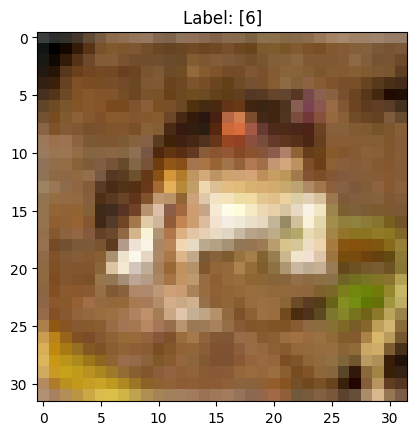

In [2]:
# Display the first image
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.title(f"Label: {y_train[0]}")
plt.show()

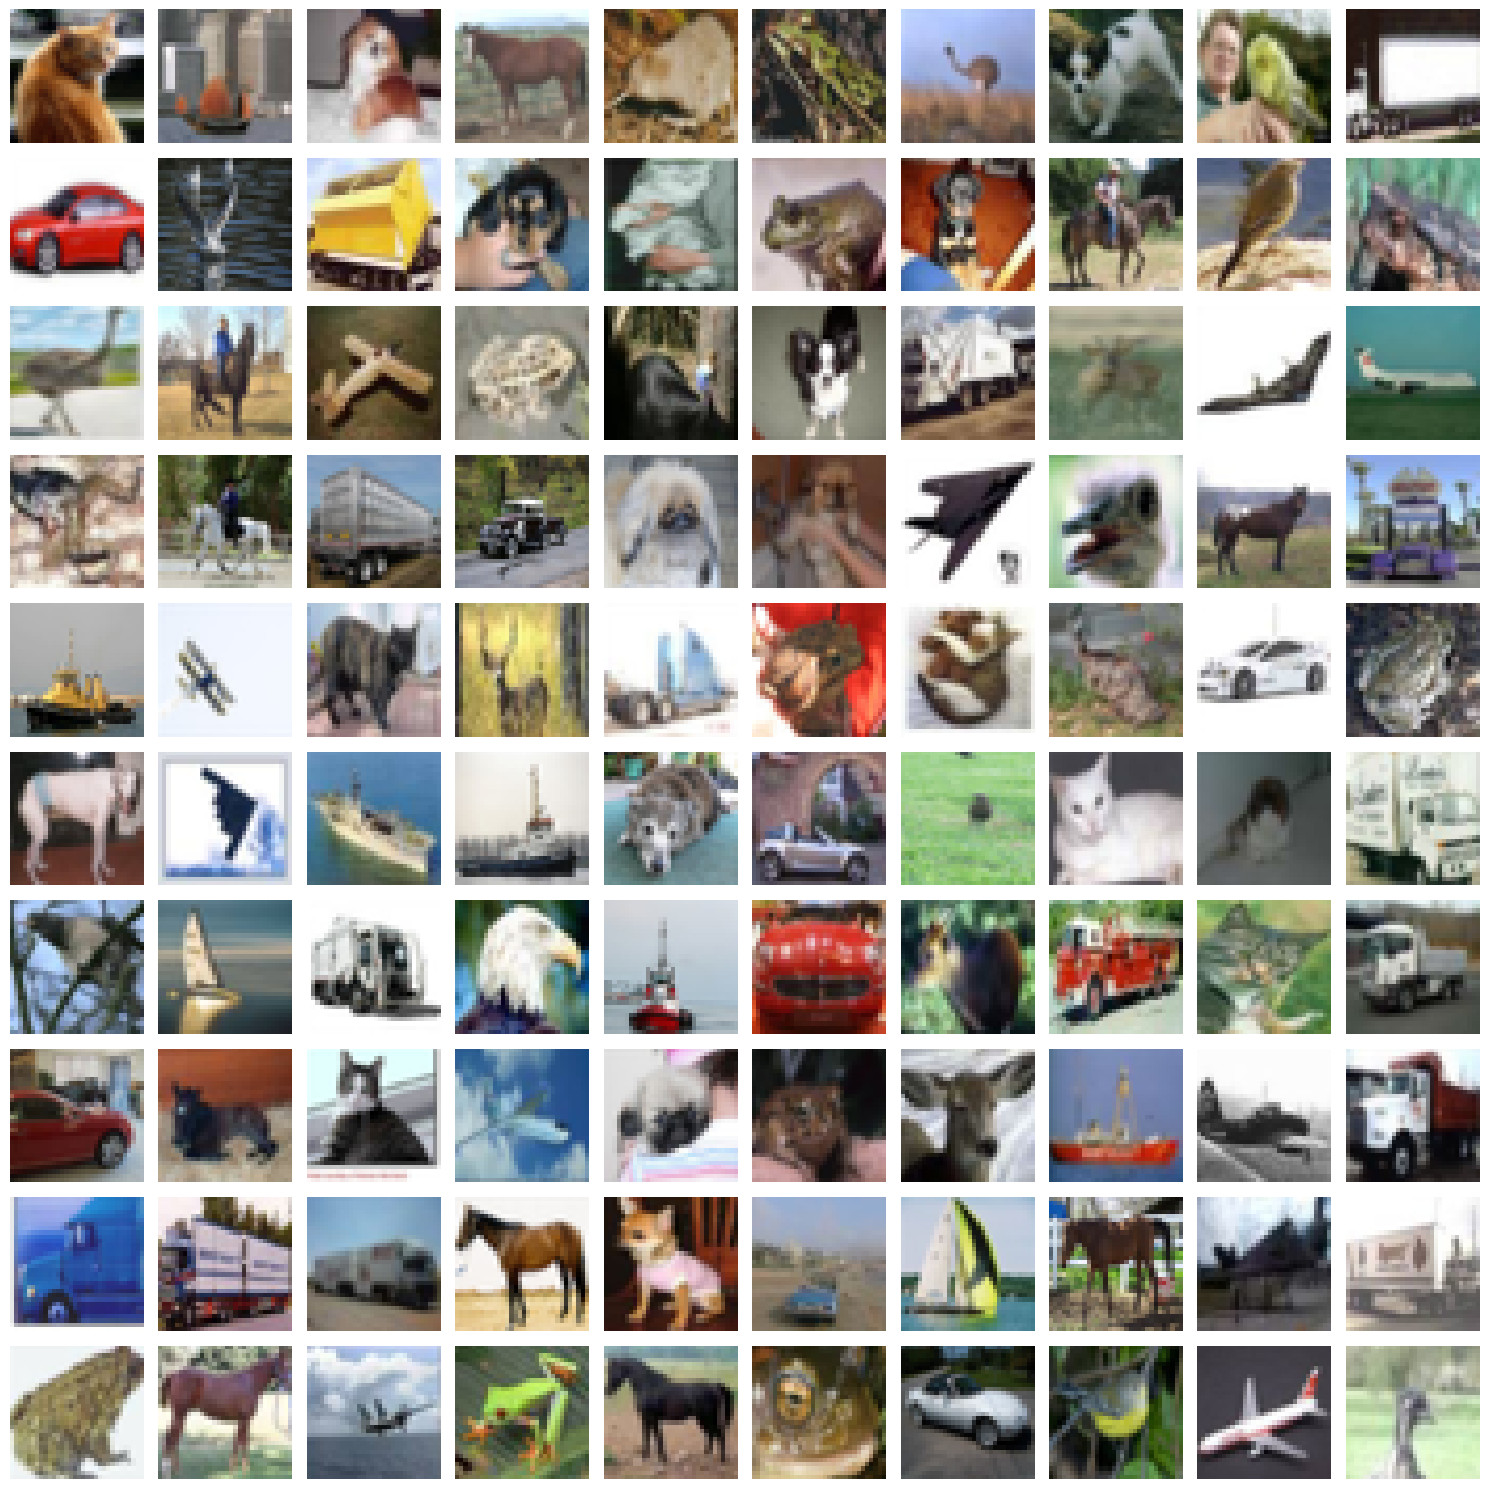

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 10x10 grid
plt.figure(figsize=(15, 15))  # Set the figure size for better visibility

# Randomly select 100 indices
random_indices = np.random.choice(len(x_train), 100, replace=False)

for i, idx in enumerate(random_indices):
    plt.subplot(10, 10, i + 1)  # Create a 10x10 grid
    plt.imshow(x_train[idx], cmap=plt.get_cmap('gray'))  # Display a random image
    plt.axis('off')  # Turn off axes for cleaner visualization

plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()


### Get Range of values:

In [4]:
print("Minimum value:", np.min(x_train))  # Find the minimum value
print("Maximum value:", np.max(x_train))  # Find the maximum value
print("Range:", np.ptp(x_train))  # Range = max - min

Minimum value: 0
Maximum value: 255
Range: 255


### Visualization Content:

In [ ]:
type(x_train)
print(x_train)

x_train.shape

### Coverting Labels:

In [ ]:
from tensorflow.keras.utils import to_categorical

# Assuming your dataset loading looks like this
# X_train, X_test, y_train, y_test = ... (load your dataset here)

# One-hot encode the labels
y_train_encoded = to_categorical(y_train, num_classes=10)  # Replace 10 with the number of classes
y_test_encoded = to_categorical(y_test, num_classes=10)

# Optional: Print to verify
print(y_train_encoded)
print(y_test_encoded)

### Normalizing the Data:

In [ ]:
print("Minimum value:", np.min(x_train))  # Find the minimum value
print("Maximum value:", np.max(x_train))  # Find the maximum value
print("Range:", np.ptp(x_train))  # Range = max - min

In [ ]:
from tensorflow.keras.utils import to_categorical

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Assuming y_train and y_test are your target labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


print(x_train.shape)
print(x_test.shape)

# __Defining the first model / taken from the Lab__

In [ ]:
from keras.backend import clear_session
clear_session()

# Model / data parameters
num_classes = 10
input_shape_value = (32, 32, 3)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = keras.Sequential()

model.add(Conv2D(32, (3, 3), activation="relu", input_shape = input_shape_value))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())


model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation="softmax"))

model.summary()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.image import resize
import tensorflow as tf

batch_size_value = 512
epochs_value = 1

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),  # Increased from 0.001
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history = model.fit(x_train, y_train_encoded, batch_size=batch_size_value, epochs=epochs_value, validation_data=(x_test, y_test_encoded))

*   Plot the cross entropy loss curve and the accuracy curve

In [ ]:
print(history.history.keys())

print(history.history['loss']) # returns the loss value at the end of each epoch
print(history.history['accuracy']) # returns the accuracy at the end of each epoch

In [ ]:
plt.figure(figsize=(5, 5))  # Set figure size for better clarity

# First subplot for loss
plt.subplot(211)
plt.title('Cross Entropy Loss Model #1')
plt.plot(history.history['loss'], color='blue', label='Model #1')
plt.xlabel('Epochs')  # Add x-label for consistency
plt.ylabel('Loss')    # Add y-label
plt.legend()

# Second subplot for accuracy
plt.subplot(212)
plt.title('Classification Accuracy Model #1')
plt.plot(history.history['accuracy'], color='blue', label='Model #1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Adjust spacing between plots to prevent overlap
plt.subplots_adjust(hspace=0.4)

plt.show()

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Print results for both models
print("\033[1mFirst Architecture Approach:\033[0m")
print(history.history.keys())
print("Test loss:", score[0])
print("Test accuracy:", score[1], "\n")

### Confuion Matrix to see the performance:

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Predictions and ground truth
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)
gt = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(gt, predictions)

# Create a heatmap using seaborn
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Model #1')
plt.show()


Scoring:

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

## Defining a #2 Model with deeper Network

In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model2 = keras.Sequential()

model2.add(Conv2D(32, (3, 3), padding='same', activation="relu", input_shape = input_shape_value))
model2.add(Dropout(0.2))

model2.add(Conv2D(32, (3, 3), padding='same', activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.3))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation="softmax"))

model2.summary()

In [ ]:
batch_size_value = 512
epochs_value = 1

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Stop when accuracy stops improving
    patience=10,              # Allow 5 epochs without improvement
    restore_best_weights=True
)
from keras.callbacks import ReduceLROnPlateau

# Learning Rate Scheduler
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',     # Monitor validation loss
    factor=0.5,             # Reduce learning rate by half
    patience=3,             # Wait 3 epochs before reducing the rate
    min_lr=1e-6             # Set a minimum learning rate
)

model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),  # Increased from 0.001
               loss='categorical_crossentropy',
               metrics=['accuracy'],
               )

history2 = model2.fit(
      x_train, y_train_encoded,
      batch_size=batch_size_value,
      epochs=epochs_value,
      validation_data=(x_test, y_test_encoded),
      callbacks=[reduce_lr, early_stopping]
)

In [ ]:
plt.figure(figsize=(5, 5))  # Set figure size for better clarity

# First subplot for loss
plt.subplot(211)
plt.title('Cross Entropy Loss Model #1 & #2')
plt.plot(history.history['loss'], color='blue', label='Model #1')
plt.plot(history2.history['loss'], color='green', label='Model #2')
plt.xlabel('Epochs')  # Add x-label for consistency
plt.ylabel('Loss')    # Add y-label
plt.legend()

# Second subplot for accuracy
plt.subplot(212)
plt.title('Classification Accuracy Model #1 & #2')
plt.plot(history.history['accuracy'], color='blue', label='Model #1')
plt.plot(history2.history['accuracy'], color='green', label='Model #2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Adjust spacing between plots to prevent overlap
plt.subplots_adjust(hspace=0.4)

plt.show()

# Print results for both models
print("\033[1mFirst Architecture Approach:\033[0m")
print(history.history.keys())
print("Test loss:", score[0])
print("Test accuracy:", score[1], "\n")

print("\033[1mDeeper Architecture:\033[0m")
print(history2.history.keys())
score2 = model2.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score2[0])
print("Test accuracy:", score2[1])


### Confusion Matrix to see the performance better

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Predictions and ground truth for model #1
predictions1 = model.predict(x_test)
predictions1 = np.argmax(predictions1, axis=1)
gt1 = np.argmax(y_test, axis=1)
cm1 = confusion_matrix(gt1, predictions1)

# Predictions and ground truth for model #2
predictions2 = model2.predict(x_test)
predictions2 = np.argmax(predictions2, axis=1)
gt2 = np.argmax(y_test, axis=1)
cm2 = confusion_matrix(gt2, predictions2)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Confusion matrix for Model #1
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=axs[0])
axs[0].set_title('Confusion Matrix Model #1')
axs[0].set_xlabel('Predicted Labels')
axs[0].set_ylabel('True Labels')

# Confusion matrix for Model #2
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=axs[1])
axs[1].set_title('Confusion Matrix Model #2')
axs[1].set_xlabel('Predicted Labels')
axs[1].set_ylabel('True Labels')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)  # Replace X_test and y_test with your data
loss2, accuracy2 = model2.evaluate(x_test, y_test, verbose=0)  # Replace X_test and y_test with your data

# Print the accuracy
print(f"Test Accuracy Model #1: {accuracy * 100:.2f}%")
print(f"Test Accuracy Model #2: {accuracy2 * 100:.2f}%")


## Defining a #3 Model with deeper Network / more complex

In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
from keras.backend import clear_session
clear_session()

from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D


# Define input shape for the VGG-like architecture
input_shape_value3 = (64, 64, 3)  # Input as per VGG guidelines
num_classes = 10  # Number of classes for classification

model3 = keras.Sequential()

# Block 1
model3.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape_value3))
model3.add(BatchNormalization())  # Add Batch Normalization
model3.add(Dropout(0.2))  # Moderate dropout after first conv block
model3.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Block 2
model3.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))  # Slightly higher dropout for deeper layers

# Block 3
model3.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.5))  # Higher dropout for even deeper layers


model3.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model3.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.5))  # Higher dropout for even deeper layers


# Replace Flatten with GAP
model3.add(GlobalAveragePooling2D())  # GAP for dimensionality reduction
model3.add(Dense(128, activation='relu'))  # Dense layer follows GAP
model3.add(Dropout(0.5))  # Dropout for regularization
model3.add(Dense(num_classes, activation='softmax'))  # Output layer

model3.summary()  # Print the architecture summary

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.image import resize
import tensorflow as tf


# Resize x_train and x_test
x_train_resized = tf.image.resize(x_train, (64, 64), method=tf.image.ResizeMethod.BICUBIC)
x_test_resized = tf.image.resize(x_test, (64, 64), method=tf.image.ResizeMethod.BICUBIC)
y_train_resized = tf.image.resize(x_train, (64, 64), method=tf.image.ResizeMethod.BICUBIC)
y_test_resized = tf.image.resize(x_test, (64, 64), method=tf.image.ResizeMethod.BICUBIC)

In [ ]:
# Display the first image
import matplotlib.pyplot as plt
plt.imshow(x_train_resized[0])
plt.title(f"Label: {y_train_resized[0]}")
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size_value = 512
epochs_value = 150

# Advanced Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(x_train_resized)
train_generator = datagen.flow(x_train_resized, y_train, batch_size=32)


from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Stop when accuracy stops improving
    patience=10,              # Allow 5 epochs without improvement
    restore_best_weights=True
)
from keras.callbacks import ReduceLROnPlateau

# Learning Rate Scheduler
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',     # Monitor validation loss
    factor=0.5,             # Reduce learning rate by half
    patience=5,             # Wait 3 epochs before reducing the rate
    min_lr=1e-7             # Set a minimum learning rate
)

# optimizing class cats
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    "balanced", classes=np.unique(y_train.argmax(axis=1)), y=y_train.argmax(axis=1)
)
# class_weights_dict[cat_class_index] *= 0.8  # Decrease the weight for "cat"
class_weights_dict = dict(enumerate(class_weights))
print("Final Class Weights:", class_weights_dict)



optimizer = tf.keras.optimizers.AdamW(learning_rate=0.001)

# Compile and Train Model with Scheduler
model3.compile(
    optimizer=optimizer,  # Initial LR
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history3 = model3.fit(
    train_generator,
    epochs= epochs_value,  # Use higher max epochs, but early stopping and scheduler will manage it
    batch_size=batch_size_value,
    validation_data=(x_test_resized, y_test),
    callbacks=[reduce_lr, early_stopping],
    class_weight=class_weights_dict
)

Final Class Weights: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0}
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 50ms/step - accuracy: 0.2961 - loss: 1.9246 - val_accuracy: 0.3208 - val_loss: 2.1453 - learning_rate: 0.0010
Epoch 2/150
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.4695 - loss: 1.4789 - val_accuracy: 0.5636 - val_loss: 1.1958 - learning_rate: 0.0010
Epoch 3/150
1501/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5286 - loss: 1.3225

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 10))  # Set figure size for better clarity

# First subplot for loss
plt.subplot(211)
plt.title('Cross Entropy Loss - Model #1, #2 & #3')
plt.plot(history.history['loss'], color='blue', label='Model #1')
plt.plot(history2.history['loss'], color='green', label='Model #2')
plt.plot(history3.history['loss'], color='red', label='Model #3')
plt.xlabel('Epochs')  # Add x-label for consistency
plt.ylabel('Loss')    # Add y-label
plt.legend()

# Second subplot for accuracy
plt.subplot(212)
plt.title('Classification Accuracy - Model #1, #2 & #3')
plt.plot(history.history['accuracy'], color='blue', label='Model #1')
plt.plot(history2.history['accuracy'], color='green', label='Model #2')
plt.plot(history3.history['accuracy'], color='red', label='Model #3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Adjust spacing between plots to prevent overlap
plt.subplots_adjust(hspace=0.5)

plt.show()

# Print results for all models
print("\033[1mModel #1 Architecture:\033[0m")
print(history.history.keys())
print("Test loss:", score[0])
print("Test accuracy:", score[1], '\n')

print("\033[1mModel #2 Architecture:\033[0m")
print(history2.history.keys())
print("Test loss:", score2[0])
print("Test accuracy:", score2[1], '\n')

print("\033[1mModel #3 Architecture:\033[0m")
print(history3.history.keys())
score3 = model3.evaluate(x_test_resized, y_test, verbose=0)
print("Test loss:", score3[0])
print("Test accuracy:", score3[1])


### Confusion Matrix to see the performance:

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Predictions and ground truth for model #1
predictions1 = model.predict(x_test)
predictions1 = np.argmax(predictions1, axis=1)
gt1 = np.argmax(y_test, axis=1)
cm1 = confusion_matrix(gt1, predictions1)

# Predictions and ground truth for model #2
predictions2 = model2.predict(x_test)
predictions2 = np.argmax(predictions2, axis=1)
gt2 = np.argmax(y_test, axis=1)
cm2 = confusion_matrix(gt2, predictions2)

# Before making predictions, resize x_test to match the training size
x_test_resized = tf.image.resize(x_test, (64, 64), method=tf.image.ResizeMethod.BICUBIC) # Assuming your model was trained on 128x128 images

# Predictions and ground truth for model #3
predictions3 = model3.predict(x_test_resized)  # Use the resized images for prediction
predictions3 = np.argmax(predictions3, axis=1)
gt3 = np.argmax(y_test, axis=1)
cm3 = confusion_matrix(gt3, predictions3)

# Create subplots for all three models
fig, axs = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# Confusion matrix for Model #1
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=axs[0])
axs[0].set_title('Confusion Matrix Model #1')
axs[0].set_xlabel('Predicted Labels')
axs[0].set_ylabel('True Labels')

# Confusion matrix for Model #2
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=axs[1])
axs[1].set_title('Confusion Matrix Model #2')
axs[1].set_xlabel('Predicted Labels')
axs[1].set_ylabel('True Labels')

# Confusion matrix for Model #3
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=axs[2])
axs[2].set_title('Confusion Matrix Model #3')
axs[2].set_xlabel('Predicted Labels')
axs[2].set_ylabel('True Labels')

# Adjust layout to ensure proper spacing
plt.tight_layout()
plt.show()


In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)  # Replace X_test and y_test with your data
loss2, accuracy2 = model2.evaluate(x_test, y_test, verbose=0)  # Replace X_test and y_test with your data
loss2, accuracy3 = model3.evaluate(x_test_resized, y_test, verbose=0)  # Replace X_test and y_test with your data

# Print the accuracy
print(f"Test Accuracy Model #1: {accuracy * 100:.2f}%")
print(f"Test Accuracy Model #2: {accuracy2 * 100:.2f}%")
print(f"Test Accuracy Model #3: {accuracy3 * 100:.2f}%")

In [ ]:
import matplotlib.pyplot as plt


# Plot the loss curve
plt.figure()
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Cross-Entropy Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.figure()
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
print("Report of Model #3")# Assuming `model3`, `x_test_resized`, and `class_names` are defined
# Get the predicted probabilities
predictions3_probs = model3.predict(x_test_resized)

# Get the predicted classes from probabilities
predicted_classes = np.argmax(predictions3_probs, axis=1)

# Generate the classification report
# print(classification_report(y_test.argmax(axis=1), predicted_classes, target_names=class_names))

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the classification report as a dictionary
report = classification_report(y_test.argmax(axis=1), predicted_classes, target_names=class_names, output_dict=True)

# Convert the report dictionary to a pandas DataFrame for better formatting
report_df = pd.DataFrame(report).transpose()

# Display the classification report as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f', cbar=False)  # Exclude accuracy row
plt.title("Classification Report Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.xticks(rotation=45)
plt.show()


In [ ]:
linkcode
y_pred_resnet=model_2.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

#Compute the confusion matrix
confusion_mtx=confusion_matrix(y_true,y_pred_resnet)

In [ ]:
linkcode
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred_resnet, classes=class_names,
                      title='Confusion matrix, without normalization')